## Global history of merger evolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
npzDir = '../FIRE_GalSep/'
picDir = '../pictures/'
fitsDir = '../data/e2/'

#### SFR history

Load the G2&G3 e2 orbit informaiton

Entry names:['sfr', 'mstar', 'isnap', 'd', 'time']
[2.61615 2.83131 2.86554]
[555 285 281 283 278 582 588 279 280 287]
2.7139499985426663
15.4982430562618


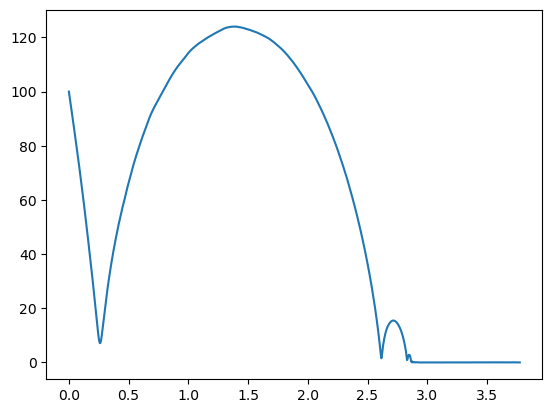

In [3]:
filename=npzDir+'galsep_G2G3_e_orbit_2.npz'

data = np.load(filename)
print('Entry names:'+str(data.files))
SFRs = data['sfr']
Times = data['time']
Snapshots = data['isnap']

d_diff = np.diff(data['d'])
d_diff_2nd = np.abs(np.diff(d_diff)) # second order difference
print(Times[np.where(d_diff_2nd >1)[0]+1])

# get the time for pericentric distance
d_diff = np.diff(data['d'])[:590]
print(np.argpartition(np.abs(d_diff),10)[:10])
print(data['time'][555])
print(data['d'][555])

fig = plt.figure()
plt.plot(data['time'], data['d'])

Check the idx for the 25th snapshot

In [4]:
Times[25]

0.12225

Load the G2&G3 e1 orbit information

Entry names:['sfr', 'mstar', 'isnap', 'd', 'time']
[ 60.  62.  64. 295. 296. 297. 298. 302. 304. 307. 312. 314. 315. 317.
 320. 321. 323. 325.]


408.0

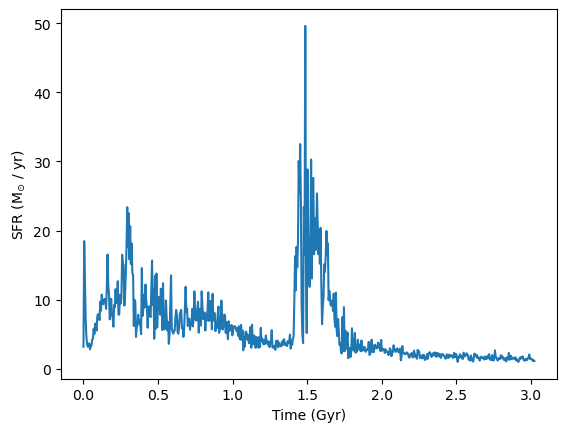

In [5]:
filename=npzDir+'galsep_G2G3_e_orbit_1.npz'

data = np.load(filename)
print('Entry names:'+str(data.files))
SFRs = data['sfr']
Times = data['time']
Snapshots = data['isnap']

# print for loop 
fig = plt.figure()
plt.plot(Times, SFRs)
plt.xlabel('Time (Gyr)')
plt.ylabel('SFR (M$_{\odot}$ / yr)')

print(Snapshots[np.where(SFRs>20)])
np.where(Times>2.5)
Snapshots[np.where(Times<2.0)][-1]

[1.40832 1.53057]
[160 158 163 161 159 162 156 167 299 164]
1.4621099973767995
9.294923747019466


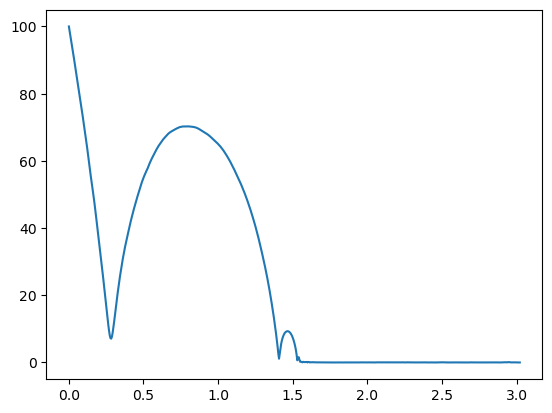

In [6]:
d_diff = np.diff(data['d'])
d_diff_2nd = np.abs(np.diff(d_diff)) # second order difference
d_diff = d_diff[:310]
# get the time for second passage and final collapse
print(Times[np.where(d_diff_2nd >1)[0]+1])
# get the time for pericentric distance
print(np.argpartition(np.abs(d_diff),10)[:10])
print(data['time'][299])
print(data['d'][299])

fig = plt.figure()
plt.plot(data['time'], data['d'])

#### Gas properties

In [7]:
# load data and information for G3 galaxy
fitsfile_i3 = fitsDir+'losvd_FIRE2_e2_540_gas_v0__32.fits'
data_i3 = fits.open(fitsfile_i3)[0].data
hdr_i3 = fits.open(fitsfile_i3)[0].header
print(hdr_i3)
# exclude pixels with 0 values
data_i3[np.where(data_i3==0)] = np.nan

print('G3 mass: '+"{:e}".format(np.nansum(data_i3)*1e10))

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  500                                                  NAXIS2  =                  250                                                  NAXIS3  =                  250                                                  EXTEND  =                    T                                                  PARTTYPE= 'gas     '           / particle type in maps                          AXIS    = 'v0      '           / instrument                                     FOVSIZE =                   25 / FOV size                                       FOVUNIT = 'kpc     '           / FOV size units                                 FOV_KPC =                   25 / [kpc/h]                                        NPIXEL  =                  250 / spatial

## Observed mergers

#### Total gas mass

In [9]:
%matplotlib inline
# vel = np.arange(-500, 500, 2)
# fitsfile = fitsDir+'losvd_FIRE2_e2_586_gas_v0__32.fits'
# data_586, mom0_586, mom1_586, mom2_586 = make_moments(fitsfile, vel)
# Mmol_586 = np.nansum(data_586)*1e10

# Calculate the median global gas fraction
Mstar_all = 3e10 + 1.2e10
MHI_all = 3e9
MH2_all = 1e9
f_gas = (MHI_all+MH2_all) / Mstar_all
f_mol = MH2_all / Mstar_all
print('Molecular gas fraction for G2&G3 is:' + str(round(f_mol,3)))

# Calculate the merger molecular gas fraction for Antennae and NGC 3256
# NGC 3256
flux_co21_Jykms = 8.0e3; flux_co10_Jykms = flux_co21_Jykms / 4 * 0.8
Mmol_3256 = 1.05e4 * 0.25 * flux_co10_Jykms * 44**2
Mstar_3256 = 1.1e11
fmol_3256 = Mmol_3256 / Mstar_3256
print('Molecular gas fraction for NGC 3256 is:' + str(round(fmol_3256,3)))
# Antennae
flux_co10_K = 3.4e5 # from CO1-0 feathered image
flux_co10_Jykms = flux_co10_K * 0.0109/1.1331 * (114.56/115.47)**2
Mmol_40389 = 1.05e4 * 1 * flux_co10_Jykms * 23**2
Mstar_40389 = 4.5e10
fmol_40389 = Mmol_40389 / Mstar_40389
print('Molecular gas fraction for NGC 4038/9 is:' + str(round(fmol_40389,3)))

Molecular gas fraction for G2&G3 is:0.024
Molecular gas fraction for NGC 3256 is:0.074
Molecular gas fraction for NGC 4038/9 is:0.397


In [ ]:
Mmol_3256/1e10
Mmol_40389/1e10

#### Separation

Seperation in NGC 3256 is recorded in Sakamoto et al. (2014). Separation of Antennae is calculated based on coordinates in Zhang & Fall (2001) assuming distance of 22 Mpc

In [ ]:
ra = 15*(12*u.deg+1*u.arcmin+53*u.arcsec); dec = -(18*u.deg+52*u.arcmin+1.9*u.arcsec)
coords_north_sky = SkyCoord(dec=dec, ra=ra, frame='icrs')
ra = 15*(12*u.deg+1*u.arcmin+53.5*u.arcsec); dec = -(18*u.deg+53*u.arcmin+9.8*u.arcsec)
coords_south_sky = SkyCoord(dec=dec, ra=ra, frame='icrs')

dist_arcsec = coords_north_sky.separation(coords_south_sky).arcsec
dist_kpc = 4.85*22*dist_arcsec/1000
print(str(dist_kpc)+' kpc')